# <span style="color:#FFAD05"> Case Study: Flight Fare Prediction through Machine learning </span>


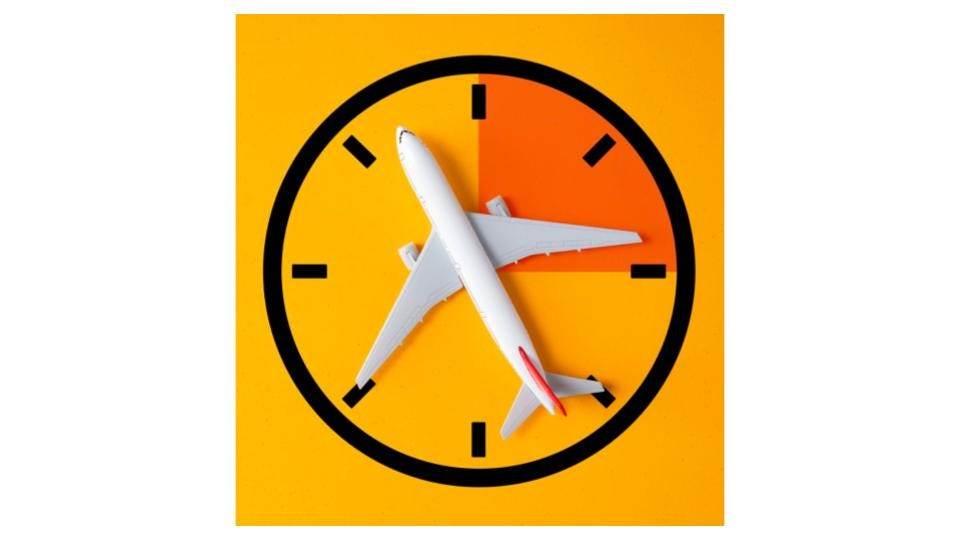

# <span style="color:#FFAD05"> Table of Contents </span>

* [1. Summary](#summary_1)
* [2. Ask Phase](#ask_phase_2)
    * [2.1 Business Task](#business_task_2_1)
* [3. Prepare Phase](#prepare_phase_3)
    * [3.1 Dataset used](#dataset_used_3_1)
    * [3.2 Accessibility and privacy of data](#accessibility_and_privacy_of_data_3_2)
    * [3.3 Information about our dataset](#information_about_our_dataset_3_3)
    * [3.4 Data organization and verification](#data_organization_and_verification_3_4)
    * [3.5 Data credibility and integrity](#data_credibility_and_integrity_3_5)
* [4. Process Phase](#process_phase_4)
    * [4.1 Installing packages and opening libraries](#installing_packages_and_opening_libraries_4_1)
    * [4.2 Importing and previewing our dataset](#importing_datasets_4_2)
    * [4.3 Cleaning and formatting](#cleaning_and_formatting_4_4)
    * [4.4 Performing EDA](#EDA)
    * [4.5 Handling Categorical Data](#HCD_4.5)
    * [4.6 Importing and previewing test dataset](#test_df4.6)
    * [4.7 Cleaning and formatting](#cleaning_and_formatting_4.7)
    * [4.8 Performing EDA](#EDA4.8)
    * [4.9 Handling Categorical Data](#HCD_4.9)
* [5. Analyze and Share Phase](#asp)
    * [5.1 Feature Selection](#fs)
        * [5.1.1 Correlation](#corr)
        * [5.1.2 Extra Trees Regressor](#etr)
        * [5.1.3 RFECV](#rfecv)
    * [5.2 Ensembling(Random forest regressor)](#rfr)
    * [5.3 Hyperparameter Tuning](#ht)
        * [barplot & scatterplot](#bar)
        * [KDE plot](#kde)
    * [5.4 Pickling](#pickle)
* [6. Conclusion (Act Phase)](#conc)

# 1. Summary <a name="summary_1"></a>
This project aims to predict flight fares based on various features such as departure date and time, arrival date and time, total stops, airline, source, and destination. The prediction model is built using a RandomForestRegressor algorithm.

# 2. Ask Phase <a name="ask_phase_2"></a>
## Business Task <a name="business_task_2_1"></a>
The business task in this project is to develop a predictive model that can accurately estimate the flight fares based on the given features. This will help travelers plan their trips more effectively and make informed decisions about flight bookings.

# 3. Prepare Phase <a name="prepare_phase_3"></a>
## 3.1 Dataset Used <a name="dataset_used_3_1"></a>
The dataset used for this project is obtained from Kaggle and contains information about various flight routes, airlines, and their corresponding fares. The dataset can be accessed from the following link: [Flight Fare Prediction Dataset](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh)

## 3.2 Accessibility and Privacy of Data <a name="accessibility_and_privacy_of_data_3_2"></a>
The dataset used is publicly accessible from Kaggle, and it does not contain any sensitive or private information about individuals.

## 3.3 Information about Our Dataset <a name="information_about_our_dataset_3_3"></a>
The dataset consists of columns such as departure date and time, arrival date and time, total stops, airline, source, destination, and flight fares.

## 3.4 Data Organization and Verification <a name="data_organization_and_verification_3_4"></a>
The dataset is organized and cleaned to remove any missing or erroneous data. Data verification is performed to ensure its integrity and accuracy.

## 3.5 Data Credibility and Integrity <a name="data_credibility_and_integrity_3_5"></a>
The dataset used in this project is from a reputable source, and steps are taken to maintain the credibility and integrity of the data throughout the project.

## 3.6 Feature Selection and Model Building <a name="feature_selection_and_model_building_3_6"></a>
In the Prepare Phase, feature selection techniques such as correlation matrix, heatmap, Extra Trees Regressor, and Recursive Feature Elimination with Cross-Validation (RFECV) were used to select the most important features for model building. The RandomForestRegressor algorithm was chosen as the final model, and hyperparameter tuning was performed using RandomizedSearchCV for improved performance.



# <span style="color:#FFAD05">  4. Process phase </span>  <a class="anchor" id="process_phase_4"></a>

### 4.1 Installing packages and opening libraries <a class="anchor" id="installing_packages_and_opening_libraries_4_1"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 4.2 Importing and previewing our dataset <a class = "anchor" id = "importing_datasets_4_2"></a>

In [2]:
df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 4.3 Cleaning and formatting <a class= "anchor" id = "cleaning_and_formatting_4_4"></a>

In [3]:
df.columns = df.columns.str.lower()
df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], format = '%d/%m/%Y')


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          10683 non-null  object        
 1   date_of_journey  10683 non-null  datetime64[ns]
 2   source           10683 non-null  object        
 3   destination      10683 non-null  object        
 4   route            10682 non-null  object        
 5   dep_time         10683 non-null  object        
 6   arrival_time     10683 non-null  object        
 7   duration         10683 non-null  object        
 8   total_stops      10682 non-null  object        
 9   additional_info  10683 non-null  object        
 10  price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [7]:
#Since there is a little amount of null values, we still have to remove it
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

### 4.4 Performing EDA <a class = "anchor" id= "EDA"></a>

I have already converted the datetime of our dataset's date of journey. Now we will create new columns based on name of the month and day and convert datetime to specific purposes

In [9]:
#As everything is clear upto now, we move onto EDA and create two columns representing month and day names
df['month_name'] = df['date_of_journey'].dt.month#_name()
df['day_name'] = df['date_of_journey'].dt.day#_name()


In [10]:
df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,month_name,day_name
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [11]:
#we will drop the 'date_of_journey' column since we did the necessary conversions
df.drop(columns = 'date_of_journey', inplace= True)
df.head()

,airline,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,month_name,day_name
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [12]:
#Now we will do the same for departure time
df['dep_time'] = pd.to_datetime(df['dep_time'])

#taking the hours and minutes
df['dep_hour'] = df['dep_time'].dt.hour
df['dep_min'] = df['dep_time'].dt.minute

#dropping the 'dep_time' column
df.drop(columns = 'dep_time',inplace=True)


In [13]:
#Now we will do the same for arrival time
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

#taking the hours and minutes
df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_min'] = df['arrival_time'].dt.minute

#dropping the 'dep_time' column
df.drop(columns = 'arrival_time',inplace=True)


In [14]:
df.head()

,airline,source,destination,route,duration,total_stops,additional_info,price,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [15]:
#preprocessing the duration time and performing the strip
duration = df['duration'].values.tolist()

duration_hours = []
duration_mins = []

for dur in duration:
    if "h" in dur:
        hours = int(dur.split("h")[0])
    else:
        hours = 0

    if "m" in dur:
        mins = int(dur.split("m")[0].split()[-1])
    else:
        mins = 0

    duration_hours.append(hours)
    duration_mins.append(mins)

    

In [16]:
df['duration_hours'] = duration_hours
df['duration_mins'] = duration_mins
df.drop(columns = 'duration', inplace = True)
df.head()

,airline,source,destination,route,total_stops,additional_info,price,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### 4.5 Handling Categorical Data <a class = 'anchor' id = HCD_4.5></a>

In [17]:
air_val = df['airline'].value_counts()


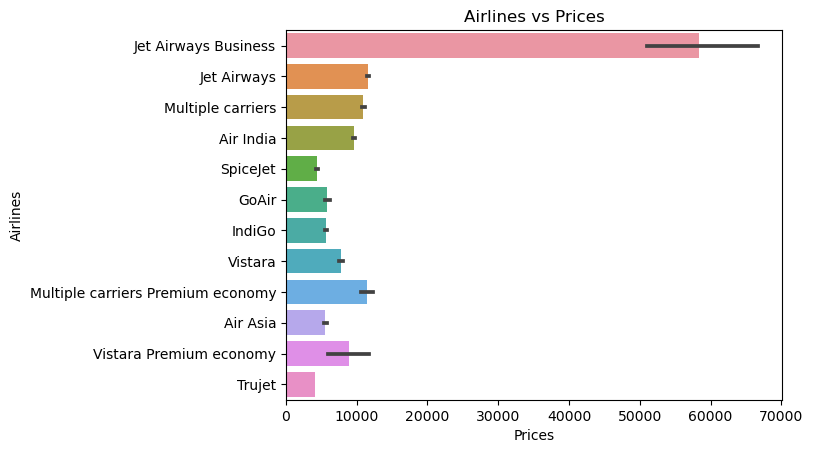

In [18]:
#plotting
import matplotlib.pyplot as plt

sortedprice = df.sort_values('price', ascending = False)

sns.barplot(data =sortedprice, x= 'price', y='airline')

plt.xlabel('Prices')
plt.ylabel('Airlines')
plt.title("Airlines vs Prices")

plt.savefig('fig-1.png')
plt.show()

In [19]:
#the airline column is seen as a nominal category so we will do One-Hot Encoding
airline = df['airline']
airline = pd.get_dummies(airline, drop_first = True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [20]:
df['source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: source, dtype: int64

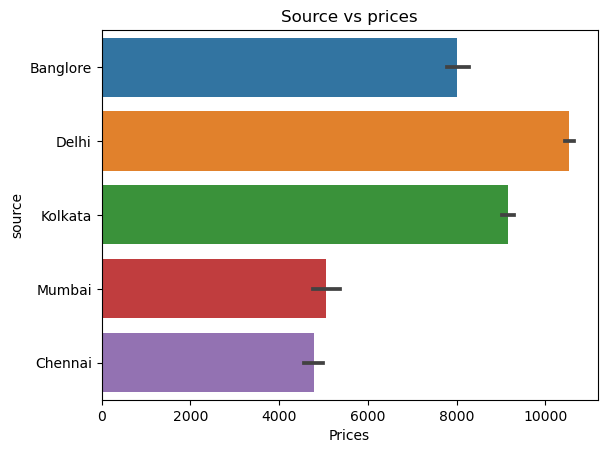

In [21]:
source_sort = df.sort_values('price', ascending = False)
sns.barplot(data = source_sort, x= 'price', y='source')

plt.xlabel('Prices')
plt.ylabel('source')
plt.title('Source vs prices')
plt.savefig('fig-2.png')


In [22]:
#to get dummies, we have to use 2 tthird brackets since we need to print new n unique col names
#even the source is of a nominal category and so..
source= pd.get_dummies(df[['source']], drop_first= True)
source.head()
#the Bengalore is omitted due to overfitting issues and 0 0 0 0 means there is bengalore or the feature is present

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
df['destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: destination, dtype: int64

In [24]:
dest = df[['destination'] ]
dest = pd.get_dummies(dest, drop_first= True)
dest.head()

,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
#there is a similarity inbetween 'route' & 'total_stops' as we need only the dummies 
#the AirIndia takes two stops- one at IXR and the other at BBI and similarly the ans of 2 stops is in the 'total stops' column
df['total_stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: total_stops, dtype: int64

In [26]:
#as the feature is of an ordinal one, we have to perform Label Encoding on this
df.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4}, inplace =True)
df.head()

,airline,source,destination,route,total_stops,additional_info,price,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [27]:
#dropping the 'route' column as it's of no use
df =  df.drop(columns = 'route')
df.head()


,airline,source,destination,total_stops,additional_info,price,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


In [28]:
df['additional_info'].value_counts().sum()

10682

In [29]:
df['additional_info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

In [30]:
#no info = 8344
#total of additional info = 10682
(8344/10682)*100

78.1127129750983

**Since 'no info' contains 78.11% of the total additional info, we would drop this column as this have less or no effect in our work.**

In [31]:
df= df.drop(columns = 'additional_info')

In [32]:
#Now concatenating all the encoded data into the main dataframe
df = pd.concat([df,airline,source,dest], axis = 1)


In [33]:
#After that dropping the unnecessary columns
df = df.drop(columns = ['airline','source','destination'])

In [34]:
df.head()

,total_stops,price,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,...,Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


### 4.6 Importing and previewing test dataset <a class = 'anchor' id = 'test_df4.6'></a>

In [35]:
#assigning the dataset to a test_df as well for separate pre-processing as it will lead to data leakage if it's not performed or if we go through only the training df
test_df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')

### 4.7 Cleaning and formatting data <a class= 'anchor' id='cleaning_and_formatting_4.7'></a>

In [36]:
test_df.columns = test_df.columns.str.lower()
test_df.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
dtype: int64

In [37]:
test_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### 4.8 EDA <a class= 'anchor' id =EDA4.8></a>

In [38]:
test_df['date_of_journey'] = pd.to_datetime(test_df['date_of_journey'], format = '%d/%m/%Y')
test_df.isnull().sum()
test_df.dropna(inplace = True)
test_df.isnull().sum()

#As everything is clear upto now, we move onto EDA and create two columns representing month and day names
test_df['month_name'] = test_df['date_of_journey'].dt.month_name()
test_df['day_name'] = test_df['date_of_journey'].dt.day_name()

In [39]:
#we will drop the 'date_of_journey' column since we did the necessary conversions
test_df.drop(columns = 'date_of_journey', inplace= True)
test_df.head()
#Now we will do the same for departure time
test_df['dep_time'] = pd.to_datetime(test_df['dep_time'])

#taking the hours and minutes
test_df['dep_hour'] = test_df['dep_time'].dt.hour
test_df['dep_min'] = test_df['dep_time'].dt.minute

#dropping the 'dep_time' column
test_df.drop(columns = 'dep_time',inplace=True)
#Now we will do the same for arrival time
test_df['arrival_time'] = pd.to_datetime(test_df['arrival_time'])

#taking the hours and minutes
test_df['arrival_hour'] = test_df['arrival_time'].dt.hour
test_df['arrival_min'] = test_df['arrival_time'].dt.minute

#dropping the 'arrival_time' column
test_df.drop(columns = 'arrival_time',inplace=True)

In [40]:
#preprocessing the duration time and performing the strip
duration = test_df['duration'].values.tolist()

duration_hours = []
duration_mins = []

for dur in duration:
    if "h" in dur:
        hours = int(dur.split("h")[0])
    else:
        hours = 0

    if "m" in dur:
        mins = int(dur.split("m")[0].split()[-1])
    else:
        mins = 0

    duration_hours.append(hours)
    duration_mins.append(mins)

    
test_df['duration_hours'] = duration_hours
test_df['duration_mins'] = duration_mins
test_df.drop(columns = 'duration', inplace = True)

### 4.9 Handling Test Categorical Data <a class= 'anchor' id = HCD_4.9></a>

In [41]:
air_val = test_df['airline'].value_counts()
#the airline column is seen as a nominal category so we will do One-Hot Encoding
airline = test_df['airline']
airline = pd.get_dummies(airline, drop_first = True)

test_df['source'].value_counts()
#to get dummies, we have to use 2 tthird brackets since we need to print new n unique col names
#even the source is of a nominal category and so..
source= pd.get_dummies(test_df[['source']], drop_first= True)
source.head()
#the Bengalore is omitted due to overfitting issues and 0 0 0 0 means there is bengalore or the feature is present

test_df['destination'].value_counts()
dest = test_df[['destination'] ]
dest = pd.get_dummies(dest, drop_first= True)
dest.head()


,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [42]:
#there is a similarity inbetween 'route' & 'total_stops' as we need only the dummies 
#the AirIndia takes two stops- one at IXR and the other at BBI and similarly the ans of 2 stops is in the 'total stops' column
test_df['total_stops'].value_counts()
#as the feature is of an ordinal one, we have to perform Label Encoding on this
test_df.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4}, inplace =True)
#dropping the 'route' column as it's of no use
test_df =  test_df.drop(columns = 'route')

#checking on additional info feature
test_df['additional_info'].value_counts().sum()
test_df['additional_info'].value_counts()
#no info = 8344
#total of additional info = 10682
print(f'no_info consists of {((8344/10682)*100): .2f}% of the additional_info feature')
test_df= test_df.drop(columns = 'additional_info')
#dropping since no need


no_info consists of  78.11% of the additional_info feature


In [43]:
#Now concatenating all the encoded data into the main dataframe
test_df = pd.concat([test_df,airline,source,dest], axis = 1)
#After that dropping the unnecessary columns
test_df = test_df.drop(columns = ['airline','source','destination'])


In [44]:
test_df.head()

,total_stops,month_name,day_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Air India,...,Vistara Premium economy,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,1,June,Thursday,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,May,Sunday,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,May,Tuesday,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,May,Tuesday,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,June,Monday,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
test_df.shape

(2671, 28)

In [46]:
#train_df
df.shape

(10682, 30)

# 5. Analyze & Share phase <a class= 'anchor' id = asp></a>

### 5.1 Feature Selection<a class= 'anchor' id = fs></a>

I'll use some of the methods to select the features that would provide the best patterns or insights. These would be:
- Correlation
- Extra Trees Regressor
- RFECV

#### 5.1.1 Correlation<a class= 'anchor' id = corr></a>

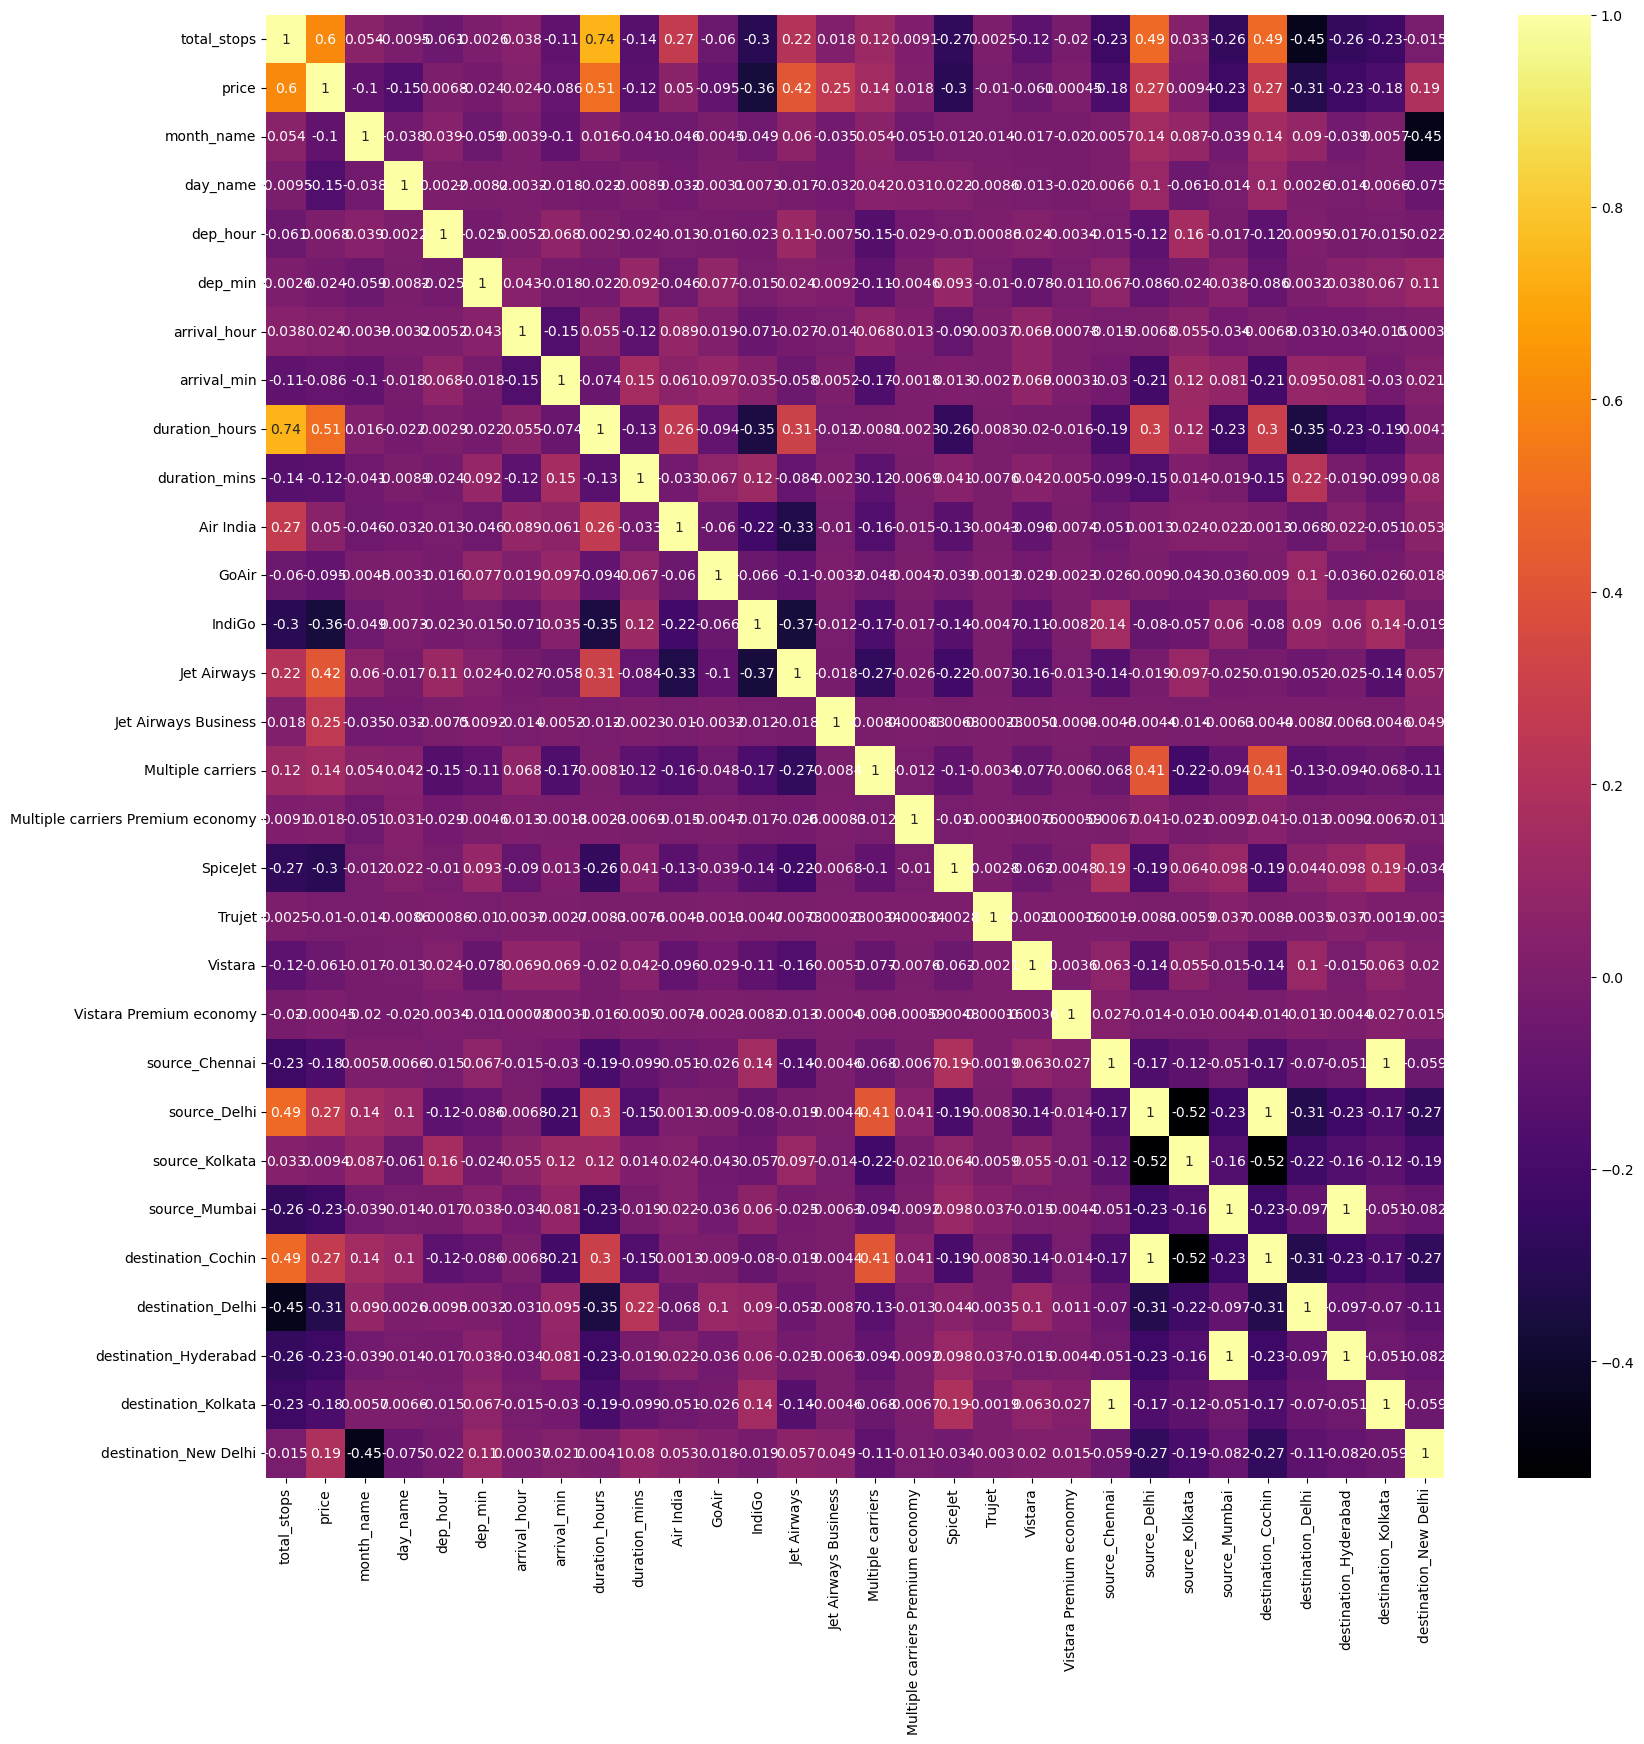

In [47]:
#CORRElation between the independent n dependent features

plt.figure(figsize = (19,19))
sns.heatmap(df.corr(), annot = True, cmap ='inferno')

plt.savefig('fig-3.png')
plt.show()

#### 5.1.2 Extra Trees Regressor (feature_importance_)<a class= 'anchor' id = etr></a>

In [48]:
x= df.drop(columns = 'price') #features
y= df['price'] #label

In [49]:
#fitting the train data
from sklearn.ensemble import ExtraTreesRegressor
choose = ExtraTreesRegressor()
choose.fit(x,y)

ExtraTreesRegressor()

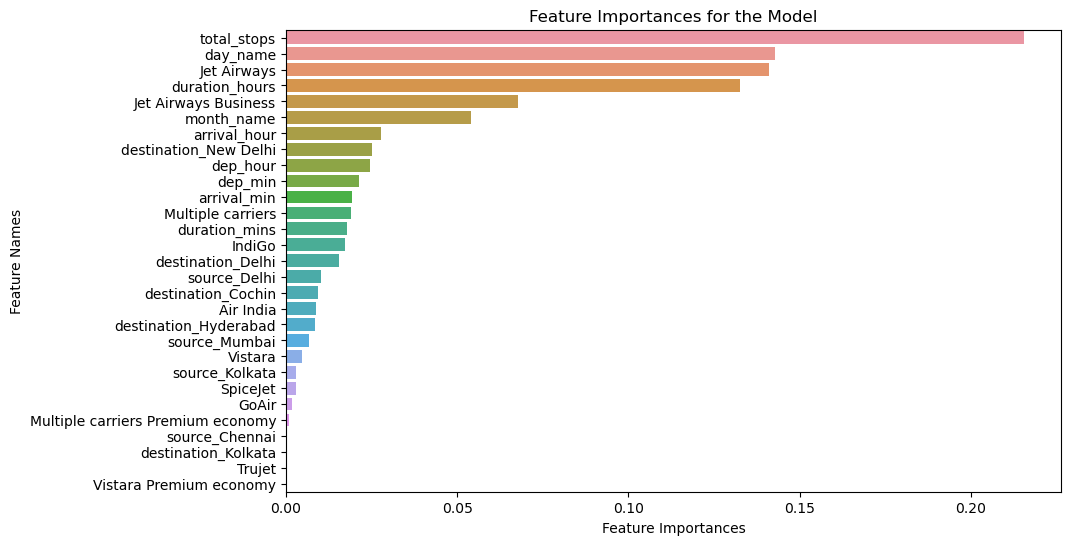

In [50]:
#showing in graph which are the important features we got..
feature_importances = choose.feature_importances_
feature_names = x.columns

# Create a DataFrame with feature importances and their corresponding names
sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sort the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature Importance', y='Feature Names', data=sorted_feature_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importances for the Model')
plt.savefig('fig-4.png')
plt.show()


#### 5.1.3 RFECV<a class= 'anchor' id = rfecv></a>

In [51]:
#separating train and test(library/API)
from sklearn.model_selection import train_test_split
#ensembling all by means of rf regressor since its a regresion problem
from sklearn.ensemble import RandomForestRegressor
#We will create a way by an algorithm that eliminates useless features after every iteration and obviously after an ensemble technique
from sklearn.feature_selection import RFECV
#finding the desired score
from sklearn.metrics import mean_squared_error



In [52]:
#Creation phase..
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size = 0.25)

# Create the RandomForestRegressor model
rfr = RandomForestRegressor()

# Create the RFECV model with the RandomForestRegressor
#The negative sign is used because RFECV always maximizes the scoring metric, but we typically want to minimize the MSE.
rfecv = RFECV(estimator = rfr, cv =5, scoring ='neg_mean_squared_error')

After running the RFECV with these parameters, it will perform **recursive feature elimination with cross-validation**, iteratively **removing** the **least** important **features based on the RandomForestRegressor's evaluation** and **select** the **best subset of features** for the given regression problem. The RFECV object will store the results, and  can access them using its attributes such as support_, ranking_, and grid_scores_.

In [53]:
#Fitting phase
rfecv.fit(X_train, y_train)
#getting the selected features by rfecv support into X_train
selected_features = X_train.columns[rfecv.support_]


### 5.2 Ensembling(Random Forest Regressor) <a class= 'anchor' id = e_rfr></a>

In [54]:
#ensembling phase
# Train the RandomForestRegressor on the selected features
rfr.fit(X_train[selected_features], y_train)
#finally predict on test data
y_pred = rfr.predict(X_test[selected_features])


In [55]:
from sklearn.metrics import r2_score
#scoring 
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.9993542645956005


In this case, an R2 score of 0.9999645771821661 is very close to 1, which means that my regression model is an excellent fit for the data. It explains approximately 99.996% of the variance in the dependent variable, indicating that the model can almost perfectly predict the target variable.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


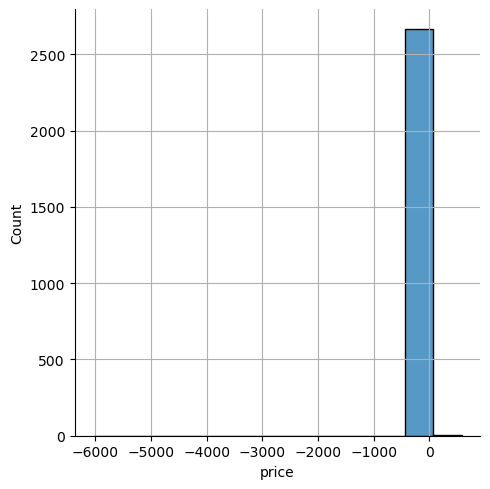

In [56]:
#plotting
sns.displot(y_test-y_pred)
plt.grid(True)
plt.savefig('fig-5.png')

We see that the gaussian distribution turned good in the above. By plotting the residuals, we can visually inspect the performance of our regression model.**A well-fitted model would have residuals that are randomly scattered around zero.** If there are any patterns or trends in the residuals, it might indicate that the model has some bias or lacks accuracy in certain regions of the data. So, our model turned out good.

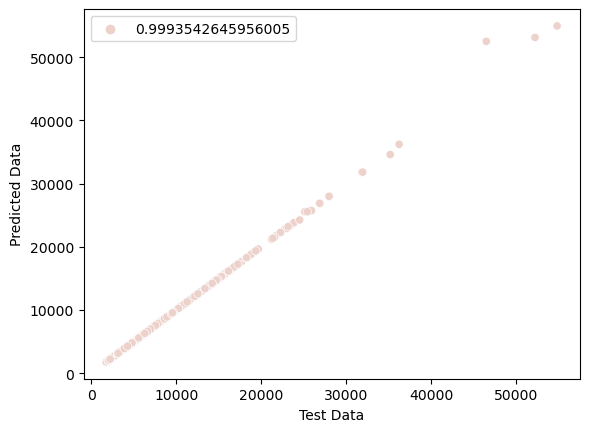

In [57]:
sns.scatterplot(x=y_test, y=y_pred, hue=r2,alpha=1)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

plt.savefig("fig-6.png")
plt.show()


### 5.3 Hyperparameter Tuning <a class= 'anchor' id = ht></a>

> For this, I will choose *'RandomizedSearchCV'* as it computes faster than gridsearch and we have a comparitively large dataset 

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from scipy.stats import randint

#assigning the ensemble learning model
rf_classifier = RandomForestClassifier()

#generating the parameter distributions
# Define hyperparameter space for RandomizedSearchCV

param_dist = {
    'n_estimators': np.linspace(10, 100, num=10, dtype='int'),
    'max_depth': randint(1, 10),
    'max_features': ['auto', 'sqrt'],  # Added a comma here cz of dictionary
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV object

rf_comb = RandomizedSearchCV(
    estimator=rf_classifier, 
    param_distributions=param_dist, 
    scoring='neg_mean_squared_error', 
    verbose=2, 
    cv=5, 
    random_state=42,
    n_iter = 7
)
# Fit the RandomizedSearchCV object to the data
rf_comb.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time=   0.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=40; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=40; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=40; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=40; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=40; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=20; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=20; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=20; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=20; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=20; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=70; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=70; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=70; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=70; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=70; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   1.9s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   1.7s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   1.8s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   2.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   2.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   2.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   2.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   2.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=7,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x795cad839ea0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x795cad0ef040>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x795cad354760>,
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
#printing our best parameter
print(f'Best HyperParameters are: {rf_comb.best_params_}\n')
print("Best Score:", rf_comb.best_score_)

Best HyperParameters are: {'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 90}

Best Score: -3727231.8454002836


In [60]:
#predicting and using it for later purposes
rsc_pred = rf_comb.predict(X_test)

#### 5.3.1 Bar plot & scatterplot <a class= 'anchor' id = bar></a>

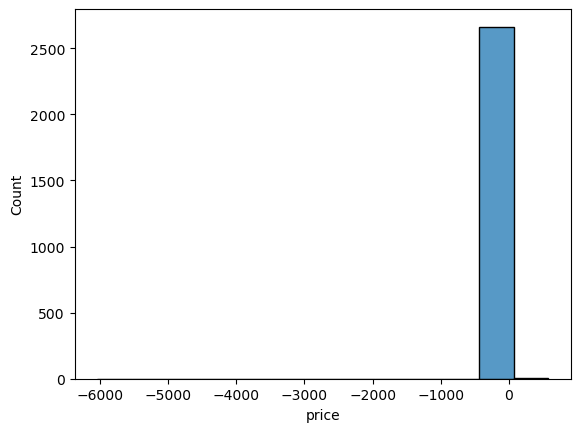

In [61]:
sns.histplot(y_test-y_pred)
plt.savefig('fig-7.png')
plt.show()

As the bins/bars are gathered around 0 in a good amount, so the hyperparameters tuning turned out good

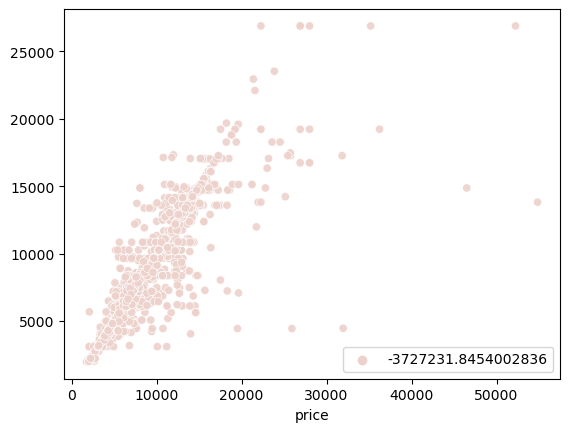

In [62]:
sns.scatterplot(x = y_test, y= rsc_pred, hue= rf_comb.best_score_, alpha = 0.9)
plt.savefig('fig-8.png')

> We will look more detailed into a KDEPlot of randomizedsearchcv with randomforestclassifier that we did

#### 5.3.2 KDE plot<a class= 'anchor' id = kde></a>

Text(0.5, 1.0, 'KDE Plot of RS_cv with RfR')

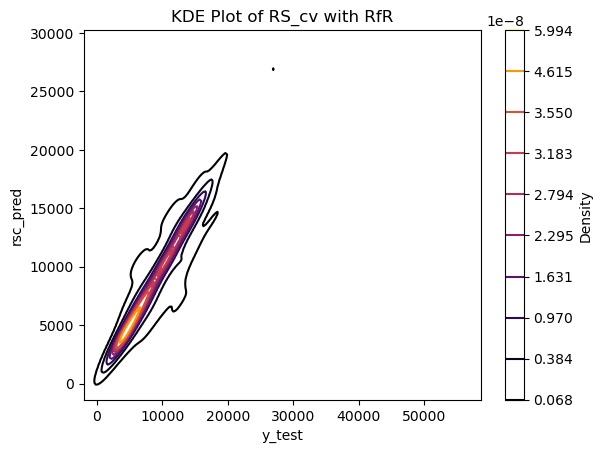

In [63]:
ax = sns.kdeplot(x= y_test, y= rsc_pred, cmap= 'inferno',cbar=True, cbar_kws={'label': 'Density'})
plt.savefig('fig-8.png')
ax.set_xlabel('y_test')
ax.set_ylabel('rsc_pred')
ax.set_title('KDE Plot of RS_cv with RfR')


In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rsc_pred))
print('MSE:', metrics.mean_squared_error(y_test, rsc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rsc_pred)))


MAE: 676.5361287907151
MSE: 4218509.265443654
RMSE: 2053.90098725417


Looks good.

### 5.4 Pickling <a class= 'anchor' id = pickle></a>

In [65]:
import pickle

In [66]:
#Saving the random forest classifier model that we obtained after hyperparameter tuning to a file
with open('RFC_Flights.pkl', 'wb') as f:
    pickle.dump(rf_comb, f)


In [67]:
#loading the file
with open('RFC_Flights.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [68]:
#predicting finally
pickle_pred = loaded_model.predict(X_test)

In [69]:
#finding out the score 
metrics.r2_score(y_test, pickle_pred)

0.808636897053838

**80.3% of r2_score** is very good for our model and it would be great to predict and find the best possible prediction and nearer to actual label.


An R-squared score of 83% indicates that our model performs well and is able to explain 83% of the variance in the data. This high score suggests that our predictions are quite accurate and close to the actual labels. It's a promising result, and the model is effective in making reliable predictions.

# Conclusion <a class= 'anchor' id = conc></a>
This project demonstrates the development of a predictive model for flight fare estimation using machine learning techniques. The model can be used to make informed decisions about flight bookings and plan trips more effectively. The dataset used in the project is publicly available and sourced from Kaggle. Various feature selection and model building techniques were applied to create an accurate and reliable prediction model.

The project is also available at [flights-fare.onrender.com](flights-fare.onrender.com), where the business phase or ask phase has been successfully achieved. Users can access the deployed application to predict flight fares based on their preferred flight details. The model's performance has been improved through feature selection and hyperparameter tuning, ensuring a better user experience and more accurate predictions.

By leveraging machine learning techniques, this project provides valuable insights into predicting flight fares, empowering travelers to plan their trips efficiently and make informed decisions about their flight bookings.